In [1]:
import pandas as pd
df_multiple_sheets = pd.read_excel('california_vehicle.xlsx',sheet_name=["County", "ZIP"])

In [2]:
county_df = df_multiple_sheets['County']
zipcode_df = df_multiple_sheets['ZIP']

In [59]:
print(len(county_df))
county_df.head()
county_df.columns

33542


Index(['Data Year', 'County', 'Dashboard Fuel Type Group', 'Fuel Type', 'Make',
       'Model', 'Number of Vehicles'],
      dtype='object')

In [6]:
county_df['County'].unique()

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Out Of State', 'Placer', 'Plumas', 'Riverside', 'Sacramento',
       'San Benito', 'San Bernardino', 'San Diego', 'San Francisco',
       'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara',
       'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou',
       'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama', 'Trinity',
       'Tulare', 'Tuolumne', 'Ventura', 'Yolo', 'Yuba', 'Out of State'],
      dtype=object)

In [10]:
cali_county_df = county_df[~county_df['County'].isin(['Out of State','Out Of State'])]
cali_county_df['County'].unique()

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [12]:
fuel_types = cali_county_df['Fuel Type'].unique()

In [30]:
statewide_vehicle_totals = county_df.groupby(['Fuel Type', 'Data Year'])['Number of Vehicles'].sum().reset_index()
statewide_vehicle_totals['Fuel Type'].unique()

array(['Battery Electric (BEV)', 'Diesel', 'Flex Fuel',
       'Fuel Cell (FCEV)', 'Gasoline', 'Gasoline Hybrid', 'Natural Gas',
       'Plug-in Hybrid (PHEV)', 'Propane'], dtype=object)

In [20]:
total_vehicles_by_year = county_df.groupby('Data Year')['Number of Vehicles'].sum().reset_index()


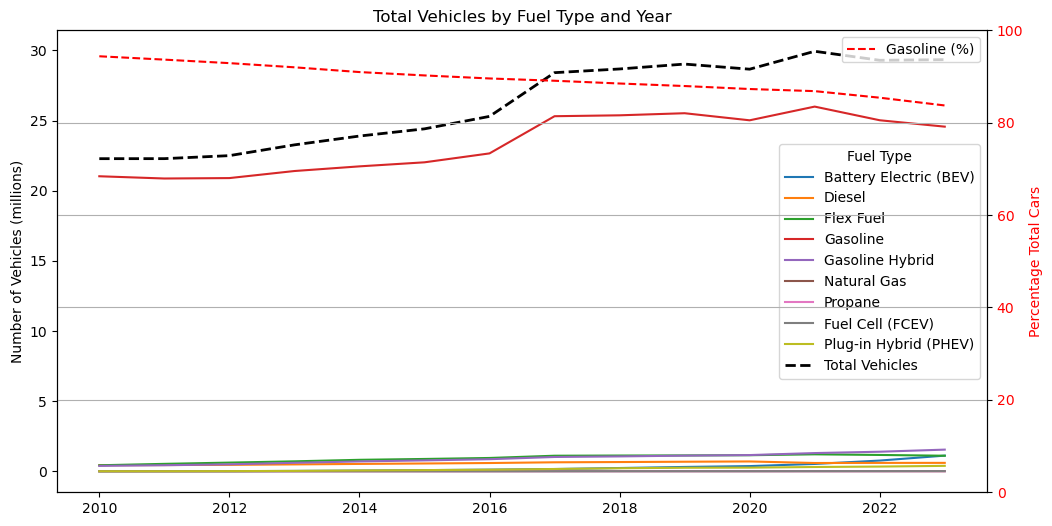

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for fuel_type in fuel_types:
    fuel_data = statewide_vehicle_totals[statewide_vehicle_totals['Fuel Type'] == fuel_type]
    plt.plot(fuel_data['Data Year'], fuel_data['Number of Vehicles']/1000000, label=fuel_type)

plt.plot(total_vehicles_by_year['Data Year'], total_vehicles_by_year['Number of Vehicles']/1000000, 
         label='Total Vehicles', color='black', linestyle='--', linewidth=2)

bev_data = statewide_vehicle_totals[statewide_vehicle_totals['Fuel Type'] == 'Battery Electric (BEV)']
gasoline_data = statewide_vehicle_totals[statewide_vehicle_totals['Fuel Type'] == 'Gasoline']

merged_data = pd.merge(bev_data[['Data Year', 'Number of Vehicles']], gasoline_data[['Data Year', 'Number of Vehicles']],
                       on='Data Year', suffixes=('_BEV', '_Gasoline'))

merged_data = pd.merge(merged_data, total_vehicles_by_year[['Data Year', 'Number of Vehicles']], 
                       on='Data Year')
#(merged_data.head())

merged_data['BEV (%)'] = (merged_data['Number of Vehicles_BEV'] / merged_data['Number of Vehicles']) * 100
merged_data['Gasoline (%)'] = (merged_data['Number of Vehicles_Gasoline'] / merged_data['Number of Vehicles']) * 100

#column_labels = ['Year', 'BEV (%)', 'Gasoline (%)']
plt.legend(title='Fuel Type')
#plt.table(cellText=table_data, colLabels=column_labels, loc='right', cellLoc='center', bbox=[0.0, -0.5, 1, 0.3])
ax1 = plt.gca()  # Get current axes instance for the main plot
ax2 = ax1.twinx()  # Create a second axes sharing the same x-axis


ax2.plot(merged_data['Data Year'], merged_data['Gasoline (%)'], color='red', linestyle='--', label='Gasoline (%)')
ax2.set_ylabel('Gasoline Vehicles (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 100)
ax2.set_ylabel('Percentage Total Cars')

plt.title('Total Vehicles by Fuel Type and Year')
plt.xlabel('Year')
ax1.set_ylabel('Number of Vehicles (millions)')
plt.legend()


plt.grid(True)
plt.show()


In [51]:
merged_data[['Data Year','BEV (%)','Gasoline (%)']].head(14)

,Data Year,BEV (%),Gasoline (%)
0,2010,0.002697,94.373850
1,2011,0.019629,93.647953
2,2012,0.035116,92.888274
3,2013,0.108059,91.985201
4,2014,0.209942,90.954741
5,2015,0.338706,90.226484
6,2016,0.456782,89.570523
7,2017,0.561985,89.075351
8,2018,0.809717,88.478982
9,2019,1.062519,87.931641


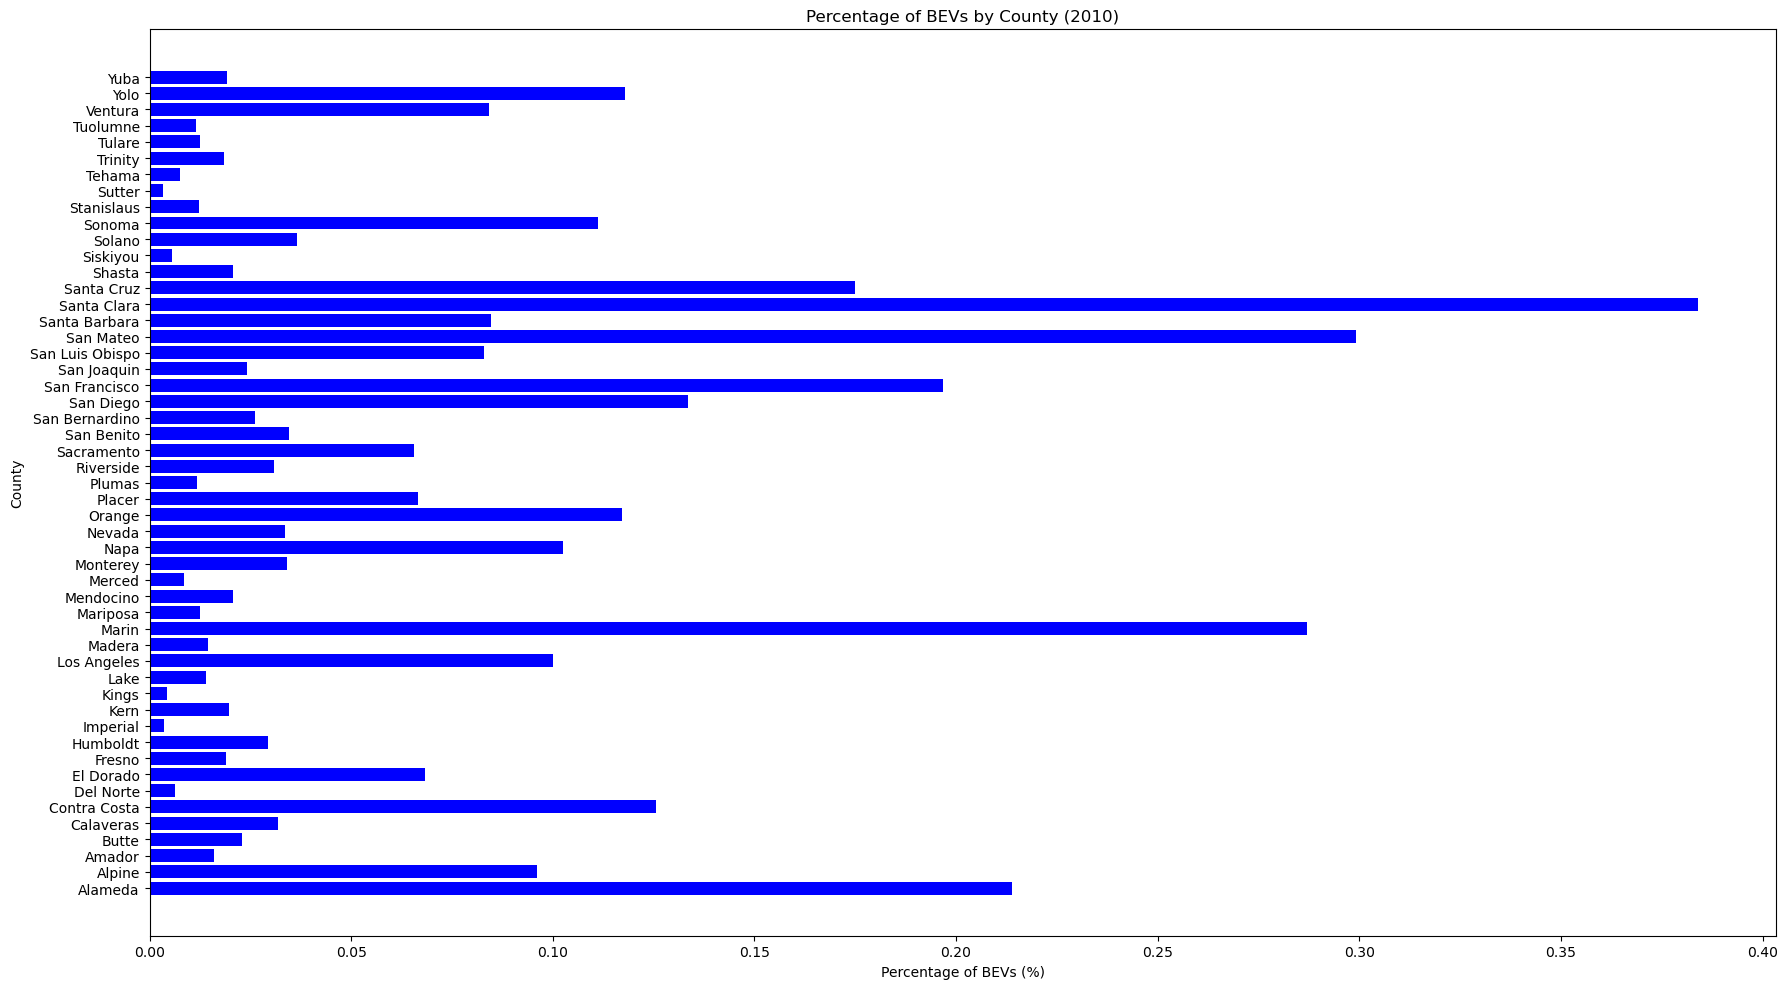

In [89]:
#table_to_be_merged=
## We want to take the data for vehicles by year and include only BEV vehicles for each county ##
def bevpercentagevisual(year):

    bev_data_year = reduced_cali_county_df[(reduced_cali_county_df['Fuel Type'] == 'Battery Electric (BEV)') & 
                                           (reduced_cali_county_df['Data Year'] == year)]
    
    
    # Total vehicles for 2010 and 2023
    total_vehicles_year = reduced_cali_county_df[reduced_cali_county_df['Data Year'] == year].groupby('County')['Number of Vehicles'].sum().reset_index()
    
    # Merge BEV data with total vehicles for each year
    merged_year = pd.merge(bev_data_year.groupby('County')['Number of Vehicles'].sum().reset_index(), total_vehicles_year, on='County', suffixes=('_BEV', '_Total'))
    
    
    # Calculate BEV percentage for 2010 and 2023
    merged_year['BEV (%)'] = (merged_year['Number of Vehicles_BEV'] / merged_year['Number of Vehicles_Total']) * 100
    
    # Step 3: Plot the data side by side
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 10), sharey=True)
    
    # Plot 2010 data
    axes.barh(merged_year['County'], merged_year['BEV (%)'], color='blue')
    axes.set_xlabel('Percentage of BEVs (%)')
    axes.set_ylabel('County')
    axes.set_title('Percentage of BEVs by County (2010)')
    
    
    
    # Display the plots
    plt.tight_layout()
    plt.show()
bevpercentagevisual(2013)


In [90]:
import plotly.graph_objects as go

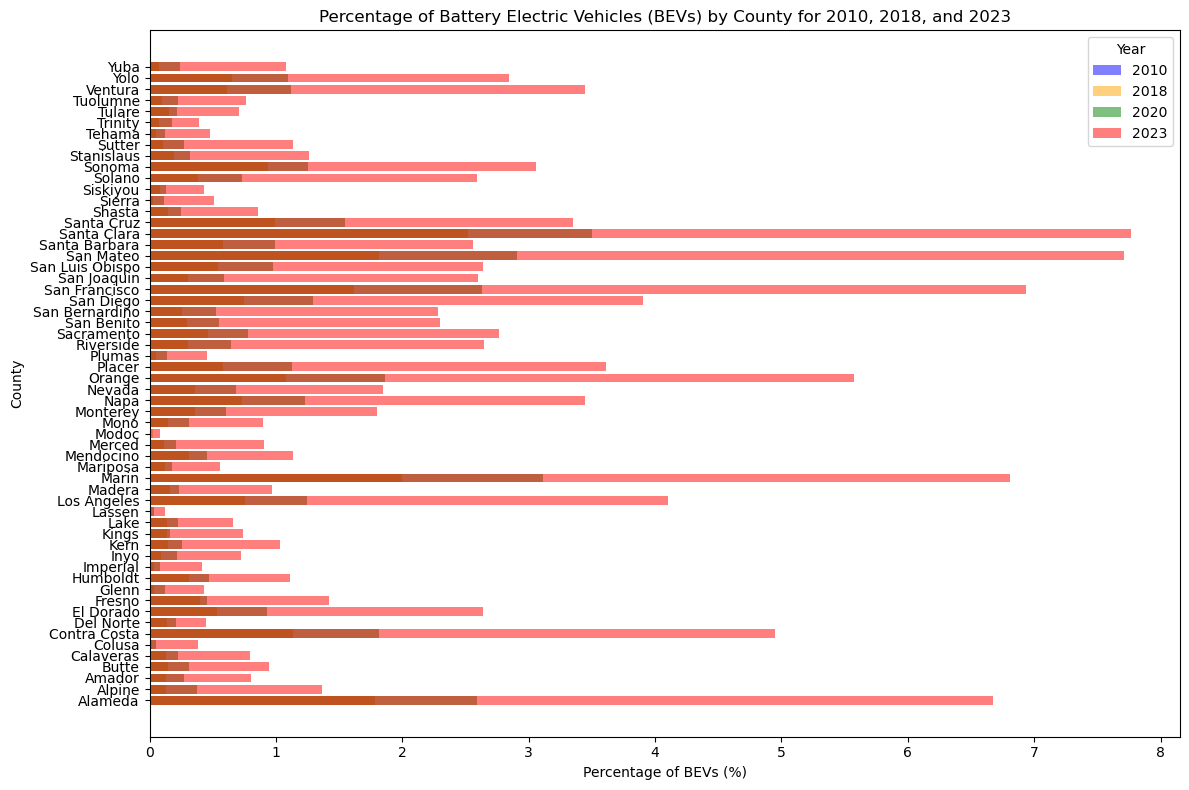

In [79]:
# Filter data for 2010, 2018, and 2023
years = [2010, 2018,2020, 2023]
filtered_data = reduced_cali_county_df[reduced_cali_county_df['Data Year'].isin(years)]


total_vehicles = filtered_data.groupby(['Data Year', 'County'])['Number of Vehicles'].sum().reset_index()

bev_data = filtered_data[filtered_data['Fuel Type'] == 'Battery Electric (BEV)']
bev_vehicles = bev_data.groupby(['Data Year', 'County'])['Number of Vehicles'].sum().reset_index()

merged_data = pd.merge(bev_vehicles, total_vehicles, on=['Data Year', 'County'], suffixes=('_BEV', '_Total'))

merged_data['BEV (%)'] = (merged_data['Number of Vehicles_BEV'] / merged_data['Number of Vehicles_Total']) * 100


pivot_data = merged_data.pivot(index='County', columns='Data Year', values='BEV (%)').fillna(0)


plt.figure(figsize=(12, 8))


for year, color in zip(years, ['blue', 'orange', 'green','red']):
    plt.barh(pivot_data.index, pivot_data[year], color=color, alpha=0.5, label=f'{year}')


plt.xlabel('Percentage of BEVs (%)')
plt.ylabel('County')
plt.title('Percentage of Battery Electric Vehicles (BEVs) by County for 2010, 2018, and 2023')
plt.legend(title='Year')


plt.tight_layout()
plt.show()